# DESKHELP TICKET DATA CLEANING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

# # #DATA SUMMARY

In [2]:
#read the data and store at dataframe
df = pd.read_csv("helpdesk_tickets.csv")
#show all columns
df.columns

Index(['Ticket Number', 'Date Created', 'Subject', 'From', 'From Email',
       'Priority', 'Department', 'Type', 'Source', 'Current Status',
       'Last Updated', 'Due Date', 'Overdue', 'Answered', 'Agent Assigned',
       'Team Lead', 'Team Assigned', 'Thread Count', 'Attachment Count',
       'Category', 'Issue Origin', 'Select Ticket Status Update',
       'Unnamed: 22', 'SR No.', 'Corrective Actions', 'Preventive Actions',
       'Closed By'],
      dtype='object')

In [3]:
#show first 10 records
df.head(10)

,Ticket Number,Date Created,Subject,From,From Email,Priority,Department,Type,Source,Current Status,...,Thread Count,Attachment Count,Category,Issue Origin,Select Ticket Status Update,Unnamed: 22,SR No.,Corrective Actions,Preventive Actions,Closed By
0,111636,03/12/2021 09:57,Error Displaying in Different Module,Jasper John,jasper.john@gmail.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Closed,...,16,2,PROD,PRODUCTION,New Ticket,NaN,NaN,NaN,NaN,NaN
1,111632,03/10/2021 16:21,Approval Workflow Error,Erick White,ewhite@yahoo.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Resolved,...,28,6,PROD,PRODUCTION,New Ticket,NaN,NaN,NaN,NaN,NaN
2,111621,2/22/21 12:08,Public IP Trusted Certificate Authority Error,Tomi Yamamoto,tyamamoto@gmail.com,Emergency,Internal Technical Department,Incident / Problem,Web,Closed,...,5,1,PROD,PRODUCTION,New Ticket,NaN,NaN,NaN,NaN,NaN
3,111608,2/15/21 11:41,JDE Slowdown,Riza Richardson,rrichardson@mailinator.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Closed,...,12,1,PROD,PRODUCTION,Close Ticket,NaN,NaN,NaN,NaN,NaN
4,111596,1/22/21 10:58,JDE Slow Down,Riza Richardson,rrichardson@mailinator.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Closed,...,7,1,PROD,PRODUCTION,Close Ticket,NaN,NaN,NaN,NaN,NaN
5,111491,8/20/20 9:36,ERROR 504 GATEWAY TIMEOUT AGAIN,Aurora Miller,aurora.miller@outlook.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Closed,...,11,1,PROD,PRODUCTION,Close Ticket,NaN,NaN,NaN,NaN,NaN
6,111571,12/10/2020 09:35,11/25/2020 8:34PM LOGIN ISSUE,Aurora Miller,aurora.miller@outlook.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Closed,...,5,4,PROD,PRODUCTION,Open,NaN,NaN,NaN,NaN,NaN
7,111572,12/10/2020 09:37,11/25/2020 1:41PM LOGIN ISSUE,Aurora Miller,aurora.miller@outlook.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Closed,...,5,1,PROD,PRODUCTION,Open,NaN,NaN,NaN,NaN,NaN
8,111573,12/10/2020 09:49,11/26/2020 9:10PM LOGIN ISSUE,Aurora Miller,aurora.miller@outlook.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Closed,...,5,1,PROD,PRODUCTION,Open,NaN,NaN,NaN,NaN,NaN
9,111575,12/10/2020 09:59,"12/01/2020 12:00PM ""bea.jolt"" login error",Aurora Miller,aurora.miller@outlook.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Closed,...,5,1,PROD,PRODUCTION,Open,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.shape)

(565, 27)


In [5]:
# Prints a summary of columns count and its dtypes but not per column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ticket Number                565 non-null    int64  
 1   Date Created                 565 non-null    object 
 2   Subject                      565 non-null    object 
 3   From                         565 non-null    object 
 4   From Email                   565 non-null    object 
 5   Priority                     565 non-null    object 
 6   Department                   565 non-null    object 
 7   Type                         563 non-null    object 
 8   Source                       565 non-null    object 
 9   Current Status               565 non-null    object 
 10  Last Updated                 565 non-null    object 
 11  Due Date                     460 non-null    object 
 12  Overdue                      565 non-null    int64  
 13  Answered            

In [6]:
df.isnull().sum()

Ticket Number                    0
Date Created                     0
Subject                          0
From                             0
From Email                       0
Priority                         0
Department                       0
Type                             2
Source                           0
Current Status                   0
Last Updated                     0
Due Date                       105
Overdue                          0
Answered                         0
Agent Assigned                   0
Team Lead                      565
Team Assigned                    0
Thread Count                     0
Attachment Count                 0
Category                       276
Issue Origin                   264
Select Ticket Status Update      4
Unnamed: 22                    565
SR No.                         565
Corrective Actions             565
Preventive Actions             565
Closed By                      565
dtype: int64

In [7]:
# summary stats of all numerical values...
#df.describe(include="all")
df.describe()

,Ticket Number,Overdue,Answered,Team Lead,Thread Count,Attachment Count,Unnamed: 22,SR No.,Corrective Actions,Preventive Actions,Closed By
count,565.000000,565.000000,565.000000,0.0,565.000000,565.000000,0.0,0.0,0.0,0.0,0.0
mean,114969.304425,0.074336,0.929204,NaN,13.534513,2.695575,NaN,NaN,NaN,NaN,NaN
std,44957.649446,0.262550,0.256712,NaN,15.392073,4.039178,NaN,NaN,NaN,NaN,NaN
min,2.000000,0.000000,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,111240.000000,0.000000,1.000000,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,111377.000000,0.000000,1.000000,NaN,9.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,111523.000000,0.000000,1.000000,NaN,16.000000,3.000000,NaN,NaN,NaN,NaN,NaN
max,694809.000000,1.000000,1.000000,NaN,179.000000,43.000000,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'Ticket Number'}>,
        <AxesSubplot:title={'center':'Overdue'}>,
        <AxesSubplot:title={'center':'Answered'}>],
       [<AxesSubplot:title={'center':'Team Lead'}>,
        <AxesSubplot:title={'center':'Thread Count'}>,
        <AxesSubplot:title={'center':'Attachment Count'}>],
       [<AxesSubplot:title={'center':'Unnamed: 22'}>,
        <AxesSubplot:title={'center':'SR No.'}>,
        <AxesSubplot:title={'center':'Corrective Actions'}>],
       [<AxesSubplot:title={'center':'Preventive Actions'}>,
        <AxesSubplot:title={'center':'Closed By'}>, <AxesSubplot:>]],
      dtype=object)

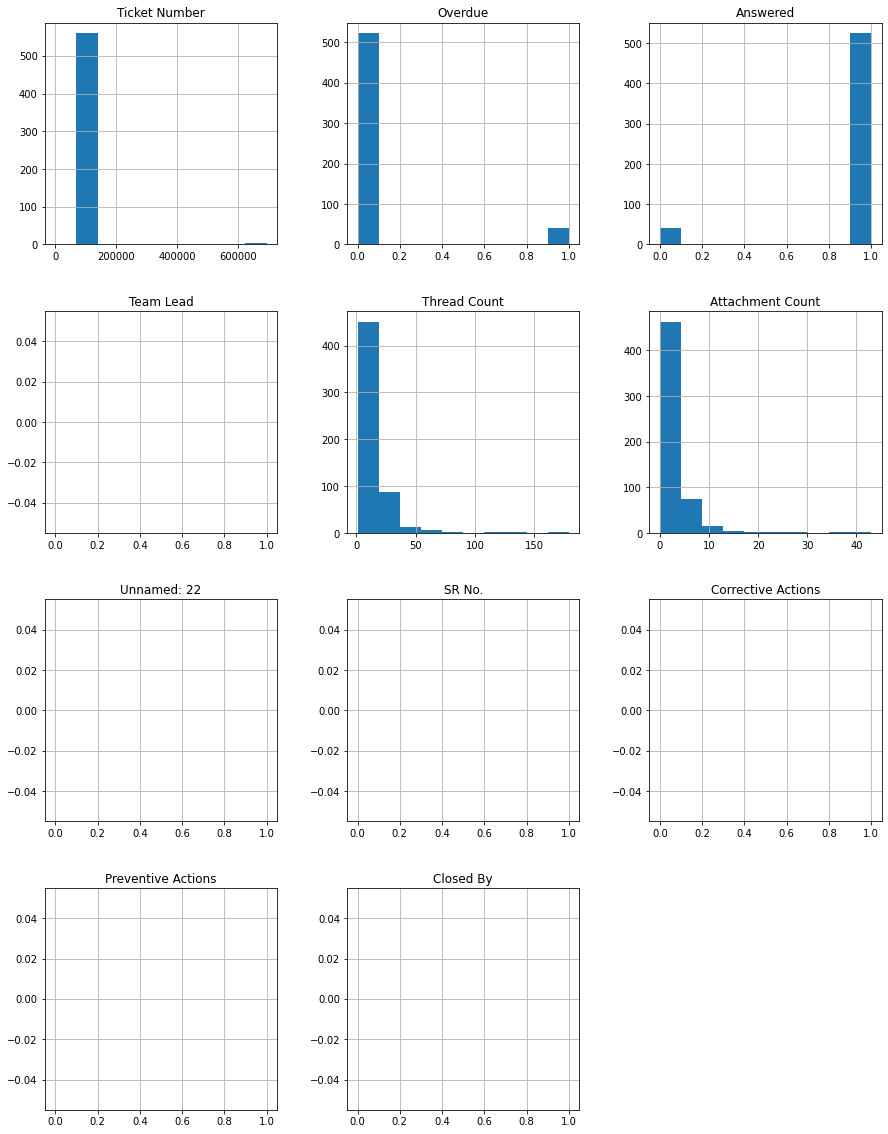

In [8]:
df.hist(figsize = (15,20))

Date Created


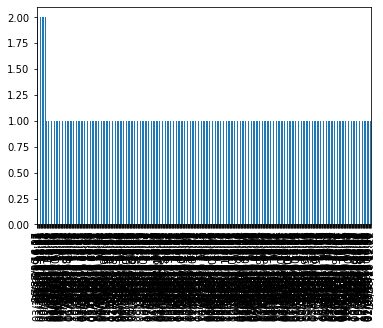

Subject


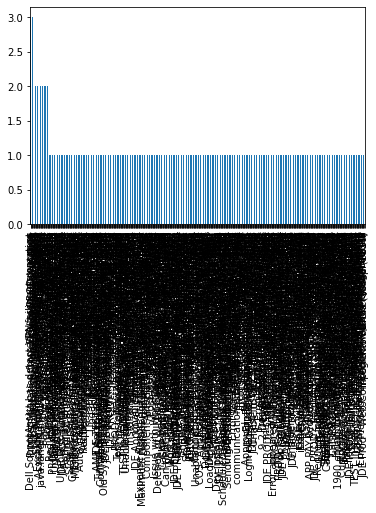

From


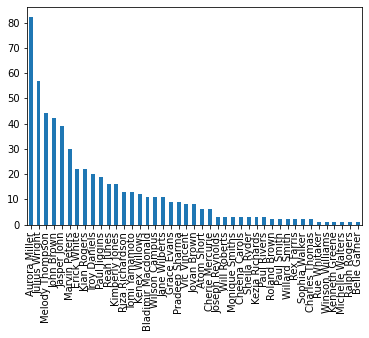

From Email


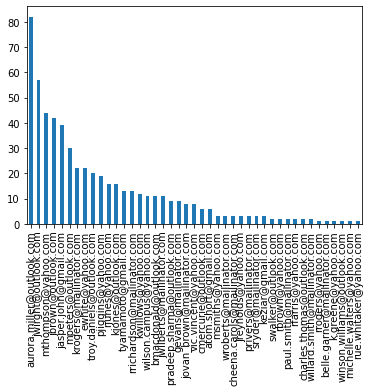

Priority


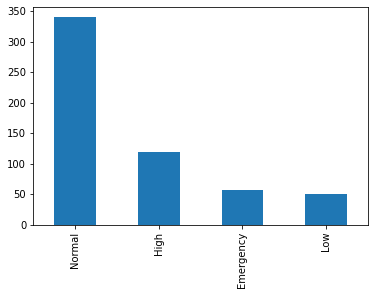

Department


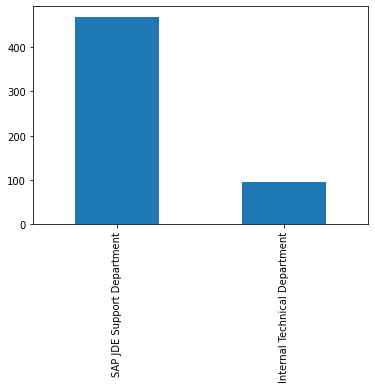

Type


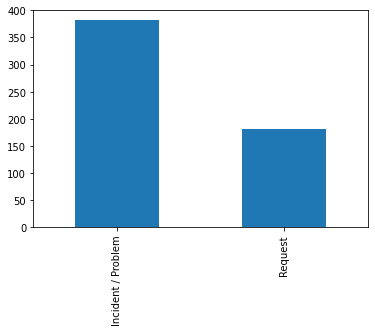

Source


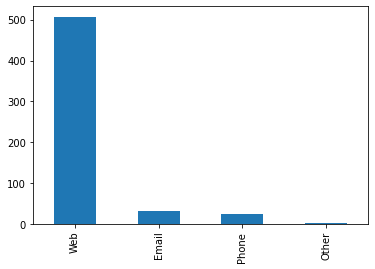

Current Status


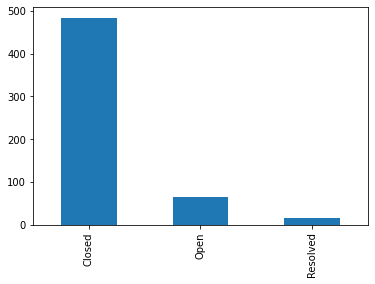

Last Updated


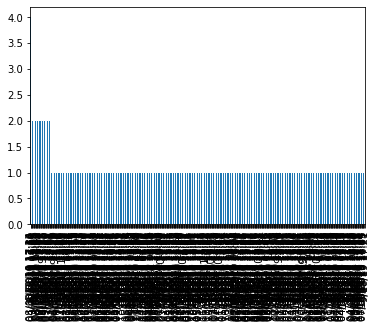

Due Date


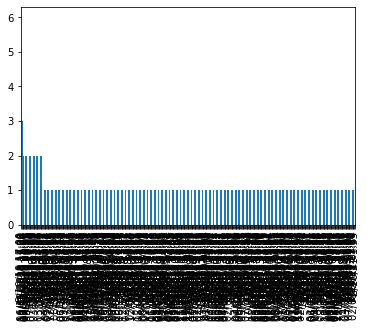

Agent Assigned


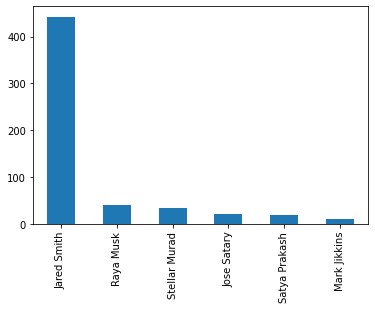

Team Assigned


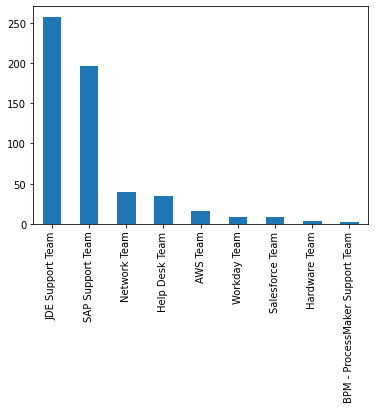

Category


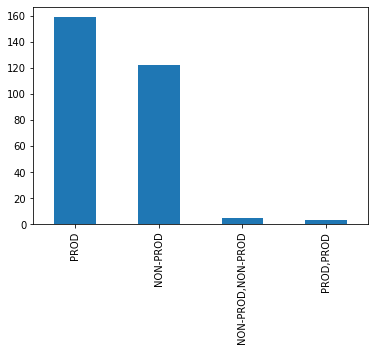

Issue Origin


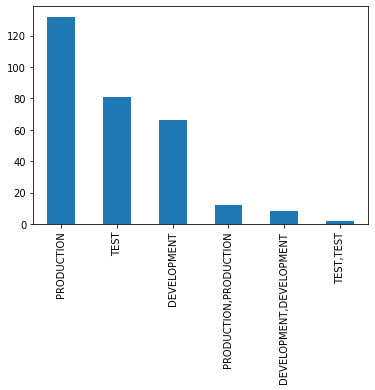

Select Ticket Status Update


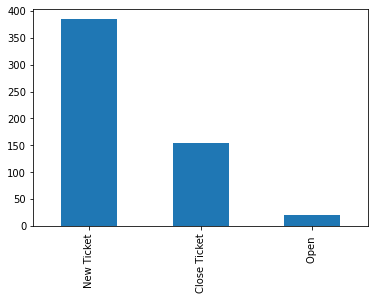

In [9]:
import matplotlib.pyplot as plt
for col in df.select_dtypes(include=object).columns: 
    print(col)
    df[col].value_counts().plot(kind='bar')
    plt.show()

In [10]:
df['Ticket Number'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
560     True
561     True
562     True
563     True
564     True
Name: Ticket Number, Length: 565, dtype: bool

In [11]:
df['Ticket Number'].duplicated().sum()

16

## Observations
### - Date Created, Last Updated and Due Date are having object Dtype and need to be changed to datetime format
### - Team Lead, Unnamed: 22, SR No, Corrective Actions, Preventive Actions and Closed By have no Data or information and should be dropped or deleted
### - This dataset has 16 duplicate 
### - This dataset has a few null values
### - In the 'Category' column we have four(4) descriptions which is meant to be two(2) description and the same applies to the 'Issue Origin' column where we have six(6) descriptions and is meant to be three(3) 

# Data Cleaning

In [12]:
# CHANGING TO DATETIME DTYPE
from datetime import datetime
df['Date Created'] = pd.to_datetime(df['Date Created'])
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Due Date'] = pd.to_datetime(df['Due Date'])
df.head(3)

,Ticket Number,Date Created,Subject,From,From Email,Priority,Department,Type,Source,Current Status,...,Thread Count,Attachment Count,Category,Issue Origin,Select Ticket Status Update,Unnamed: 22,SR No.,Corrective Actions,Preventive Actions,Closed By
0,111636,2021-03-12 09:57:00,Error Displaying in Different Module,Jasper John,jasper.john@gmail.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Closed,...,16,2,PROD,PRODUCTION,New Ticket,NaN,NaN,NaN,NaN,NaN
1,111632,2021-03-10 16:21:00,Approval Workflow Error,Erick White,ewhite@yahoo.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Resolved,...,28,6,PROD,PRODUCTION,New Ticket,NaN,NaN,NaN,NaN,NaN
2,111621,2021-02-22 12:08:00,Public IP Trusted Certificate Authority Error,Tomi Yamamoto,tyamamoto@gmail.com,Emergency,Internal Technical Department,Incident / Problem,Web,Closed,...,5,1,PROD,PRODUCTION,New Ticket,NaN,NaN,NaN,NaN,NaN


## REMOVING THE FOLLOWING COLUMNS 

In [13]:
# REMOVING THE FOLLOWING COLUMNS 
df.drop(['Team Lead', 'Unnamed: 22', 'SR No.', 'Corrective Actions', 'Preventive Actions', 'Closed By'], axis=1, inplace=True)

In [14]:
df.columns

Index(['Ticket Number', 'Date Created', 'Subject', 'From', 'From Email',
       'Priority', 'Department', 'Type', 'Source', 'Current Status',
       'Last Updated', 'Due Date', 'Overdue', 'Answered', 'Agent Assigned',
       'Team Assigned', 'Thread Count', 'Attachment Count', 'Category',
       'Issue Origin', 'Select Ticket Status Update'],
      dtype='object')

## REMOVING DUPLICATES

In [15]:
# REMOVING THE 16 DUPLICATES
df.drop_duplicates(keep='first',inplace=True)
# drops duplicates except the first occurence

## Dropping all NA from the dataset

In [16]:
#df=df.dropna()

## CLEANING COLUMNS 'CATEGORY' & 'ISSUE ORIGIN'

<AxesSubplot:>

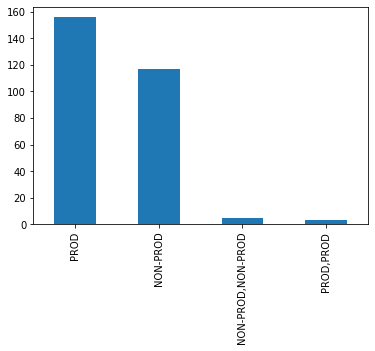

In [17]:
df['Category'].value_counts().plot(kind='bar')

<AxesSubplot:>

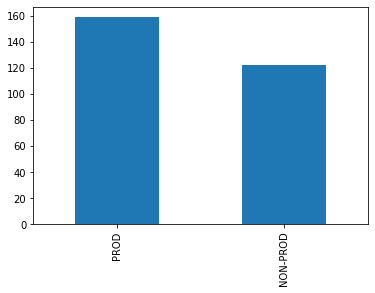

In [18]:
df['Category'].replace({'NON-PROD,NON-PROD':'NON-PROD', 'PROD,PROD' : 'PROD'}, inplace = True)
# look at the bar chart again
df['Category'].value_counts().plot(kind='bar')

<AxesSubplot:>

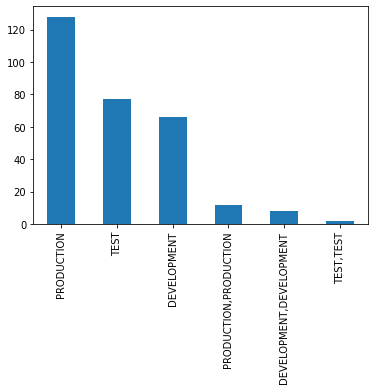

In [19]:
df['Issue Origin'].value_counts().plot(kind='bar')

<AxesSubplot:>

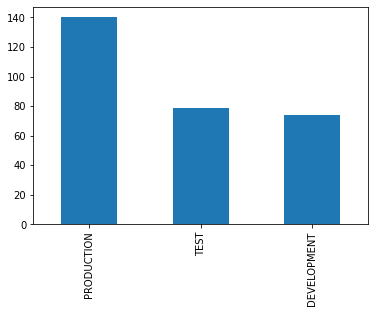

In [20]:
df['Issue Origin'].replace({'PRODUCTION,PRODUCTION':'PRODUCTION', 'DEVELOPMENT,DEVELOPMENT' : 'DEVELOPMENT','TEST,TEST':'TEST'}, inplace = True)
# look at the bar chart again
df['Issue Origin'].value_counts().plot(kind='bar')

In [21]:
# VIEWING THE DATASET
df.head()

,Ticket Number,Date Created,Subject,From,From Email,Priority,Department,Type,Source,Current Status,...,Due Date,Overdue,Answered,Agent Assigned,Team Assigned,Thread Count,Attachment Count,Category,Issue Origin,Select Ticket Status Update
0,111636,2021-03-12 09:57:00,Error Displaying in Different Module,Jasper John,jasper.john@gmail.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Closed,...,2021-03-12 13:57:00,0,1,Jared Smith,SAP Support Team,16,2,PROD,PRODUCTION,New Ticket
1,111632,2021-03-10 16:21:00,Approval Workflow Error,Erick White,ewhite@yahoo.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Resolved,...,2021-03-15 16:21:00,1,1,Mark Jikkins,JDE Support Team,28,6,PROD,PRODUCTION,New Ticket
2,111621,2021-02-22 12:08:00,Public IP Trusted Certificate Authority Error,Tomi Yamamoto,tyamamoto@gmail.com,Emergency,Internal Technical Department,Incident / Problem,Web,Closed,...,2021-02-23 00:08:00,0,1,Jared Smith,Network Team,5,1,PROD,PRODUCTION,New Ticket
3,111608,2021-02-15 11:41:00,JDE Slowdown,Riza Richardson,rrichardson@mailinator.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Closed,...,2021-02-15 23:41:00,0,1,Jared Smith,JDE Support Team,12,1,PROD,PRODUCTION,Close Ticket
4,111596,2021-01-22 10:58:00,JDE Slow Down,Riza Richardson,rrichardson@mailinator.com,Emergency,SAP JDE Support Department,Incident / Problem,Web,Closed,...,2021-01-22 22:58:00,0,1,Jared Smith,JDE Support Team,7,1,PROD,PRODUCTION,Close Ticket


In [22]:
print(df.shape)

(549, 21)


In [23]:
df.nunique()

Ticket Number                  549
Date Created                   549
Subject                        532
From                            43
From Email                      43
Priority                         4
Department                       2
Type                             2
Source                           4
Current Status                   3
Last Updated                   529
Due Date                       426
Overdue                          2
Answered                         2
Agent Assigned                   6
Team Assigned                    9
Thread Count                    57
Attachment Count                21
Category                         2
Issue Origin                     3
Select Ticket Status Update      3
dtype: int64

In [24]:
df['Current Status'].unique()

array(['Closed', 'Resolved', 'Open'], dtype=object)

In [25]:
df.isnull().sum()

Ticket Number                    0
Date Created                     0
Subject                          0
From                             0
From Email                       0
Priority                         0
Department                       0
Type                             2
Source                           0
Current Status                   0
Last Updated                     0
Due Date                       104
Overdue                          0
Answered                         0
Agent Assigned                   0
Team Assigned                    0
Thread Count                     0
Attachment Count                 0
Category                       268
Issue Origin                   256
Select Ticket Status Update      4
dtype: int64

In [26]:
df.to_csv('DeskHelpTicketClean.csv', index=False)